In [33]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("finland.tsv", delimiter="\t", header = None)

In [3]:
df.head(4)

,0,1
0,625983,297439
1,626146,297440
2,626144,297456
3,626004,297394


In [4]:
df.columns = ['col1','col2']

In [5]:
df.dtypes

col1    int64
col2    int64
dtype: object

In [6]:
df.describe()

,col1,col2
count,13467.000000,13467.000000
mean,625094.775897,289004.669043
std,7844.331518,20399.428325
min,599247.000000,212016.000000
25%,625930.000000,296164.000000
50%,626018.000000,297448.000000
75%,626192.000000,297796.500000
max,697835.000000,314328.000000


## Checking the number of null values in the dataset

In [7]:
df.isnull().sum()

col1    0
col2    0
dtype: int64

In [8]:
df.columns

Index(['col1', 'col2'], dtype='object')

### Let's look at the data on a scatterplot

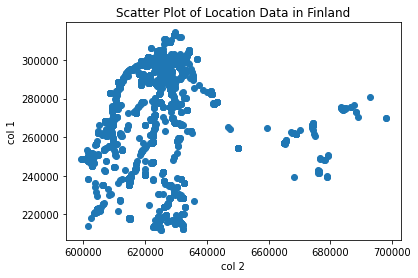

In [30]:
plt.scatter(df['col1'], df['col2'])
plt.ylabel("col 1")
plt.xlabel("col 2")
plt.title("Scatter Plot of Location Data in Finland")
plt.show()

## Testing KMeans.

### Getting the inertia value for different k-means

In [10]:
# Let's look at the inertia from 2 - 20, plot it and find the right number using the elbow method.
kmeans_inertia = pd.DataFrame(data=[], index=range(2, 21), columns=['inertia'])

n_init = 10
max_iter = 300
tol = 0.0001
random_state = 663

for n_clusters in range(2, 21):
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, max_iter=max_iter, tol=tol, random_state=random_state)
    cutoff = 99
    kmeans.fit(df)
    kmeans_inertia.loc[n_clusters] = kmeans.inertia_

## Plotting the inertia (The Elbow Curve)

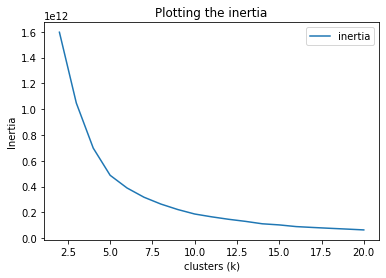

In [11]:
# Graph kmeans_inertia
# This should be unsurprising -- as we increase the number of clusters, the inertia falls
# ... and the performance increases
ax = plt.gca()

kmeans_inertia.plot(kind='line', y='inertia', ax=ax)
ax.set_xlabel('clusters (k)')
ax.set_ylabel('Inertia')
plt.title("Plotting the inertia")
plt.show()

## From the diagram above we can say that 7 clusters would be appropritate
### Testing for 7 Clusters

In [56]:
kmeans7 = KMeans(n_clusters=7)
model_7 = kmeans7.fit(df)
y_kmeans7 = kmeans7.fit_predict(df)
print(y_kmeans7)

[0 0 0 ... 0 0 0]


In [57]:
kmeans7.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [58]:
kmeans7.cluster_centers_

array([[626281.6760381 , 297867.5229816 ],
       [603333.32451923, 250069.06730769],
       [628064.74009901, 220362.52722772],
       [630697.50079491, 276853.97615262],
       [612658.68224299, 234013.89345794],
       [672426.14285714, 260883.42016807],
       [611511.67332123, 268140.55898367]])

In [59]:
# Input data
X = df.values
X

array([[625983, 297439],
       [626146, 297440],
       [626144, 297456],
       ...,
       [626050, 297404],
       [625995, 297426],
       [625982, 297431]])

In [60]:
new_df_label = df.copy()
new_df_label['label'] = pd.Series(kmeans7.labels_, index=df.index)
colors = ["black", "yellow", "green", "blue", "red","white","cyan"]
new_df_label['color'] = new_df_label['label'].map(lambda k: colors[k])
new_df_label

,col1,col2,label,color
0,625983,297439,0,black
1,626146,297440,0,black
2,626144,297456,0,black
3,626004,297394,0,black
4,626018,297437,0,black
...,...,...,...,...
13462,626042,297444,0,black
13463,625977,297443,0,black
13464,626050,297404,0,black
13465,625995,297426,0,black


In [61]:
new_df_label['color'].unique()

array(['black', 'red', 'yellow', 'cyan', 'blue', 'white', 'green'],
      dtype=object)

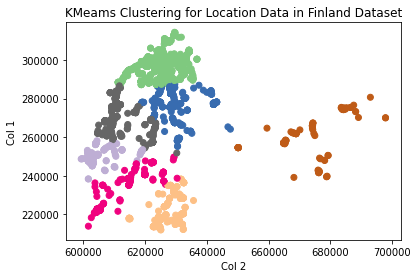

In [62]:
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans7, cmap = 'Accent')
plt.ylabel("Col 1")
plt.xlabel("Col 2")
plt.title("KMeams Clustering for Location Data in Finland Dataset")
plt.show()

In [63]:
centroids = pd.DataFrame(model_7.cluster_centers_, columns=["x1", "x2"])
centroids

,x1,x2
0,626281.676038,297867.522982
1,603333.324519,250069.067308
2,628064.740099,220362.527228
3,630697.500795,276853.976153
4,612658.682243,234013.893458
5,672426.142857,260883.420168
6,611511.673321,268140.558984


<Figure size 504x504 with 0 Axes>

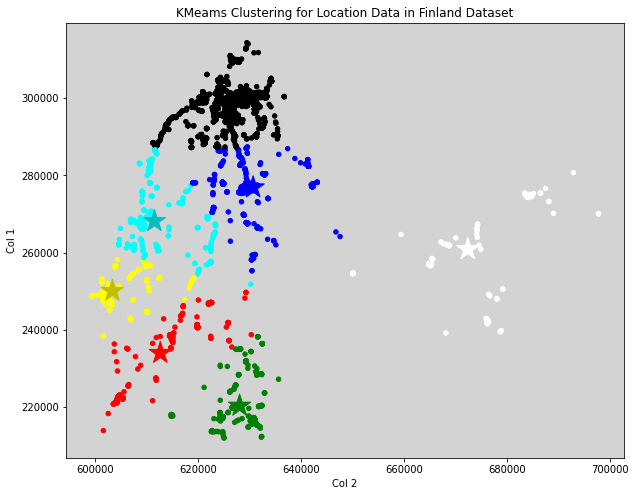

In [64]:
plt.figure(figsize=(7,7))
ax = new_df_label.plot(    
    kind="scatter", 
    x='col1', y='col2',
    figsize=(10,8),
    c = new_df_label['color']
)
ax.set_facecolor(("lightgrey"))
centroids.plot(
    kind="scatter", 
    x="x1", y="x2",
    marker="*", c=["k", "y", "g", "b", "r","w","c"], s=550,
    ax = ax
)
plt.ylabel("Col 1")
plt.xlabel("Col 2")
plt.title("KMeams Clustering for Location Data in Finland Dataset")
plt.show()

#### As the data represents location data, clusters of data points representing the different location data points collected together makes sense.

# As there is some compactness in the Datapoints, we will test `DBSCAN`.
### Now testing DBSCAN

### Scaling the data with Standard Scalar

In [34]:
scaler = StandardScaler()
X_dbscan = df.values
scaled_X_dbscan = scaler.fit_transform(X_dbscan)
scaled_X_dbscan

array([[0.11323554, 0.41347453],
       [0.13401564, 0.41352356],
       [0.13376067, 0.41430792],
       ...,
       [0.12177705, 0.41175874],
       [0.11476536, 0.41283724],
       [0.11310805, 0.41308235]])

### Getting the nearest neighbours

In [37]:
# Ref: https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc

from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=10)
n_fit = neighbors.fit(scaled_X_dbscan)
distances, indices = n_fit.kneighbors(scaled_X_dbscan)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

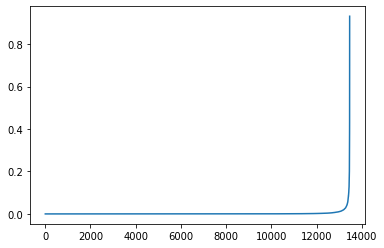

In [38]:
plt.plot(distances)

In [39]:
# Ref: https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html

# DBSCAN
db = DBSCAN(eps=0.5, min_samples=10).fit(scaled_X_dbscan)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [40]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [41]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 7
Estimated number of noise points: 7


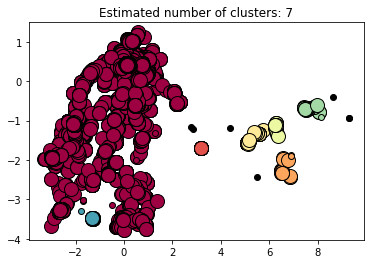

In [44]:
# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = scaled_X_dbscan[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = scaled_X_dbscan[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### Comparing them side by side

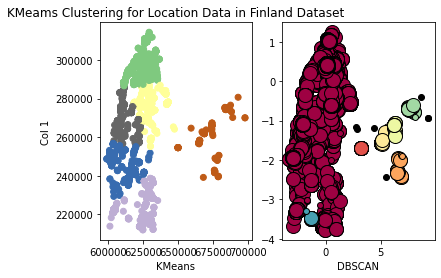

In [55]:
plt.subplot(1,2,1)

a = plt.scatter(X[:, 0], X[:, 1], c = y_kmeans6, cmap = 'Accent')
plt.ylabel("Col 1")
plt.xlabel("KMeans")
plt.title("KMeams Clustering for Location Data in Finland Dataset")

plt.subplot(1,2,2)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = scaled_X_dbscan[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = scaled_X_dbscan[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.xlabel("DBSCAN")
plt.show()

### By comparing them side by side, we realize that DBSCAN gives better results because:

- DBSCAN drops outliers from clusters
- DBSCAN shows better clustering for the data on the right half

#### 1. The reason why you chose the clustering algorithm(s)


KMeans and DBSCAN are both used when there is compactness in the dataset, which is the case with this dataset.

#### 2. Any pre-processing of the data or any hyperparameter settings

Preprocessing - Null values were removed, to eliminate any issues that could have arised while running k-means or DBSCAN.
While running K-Means algorithm several times for obtaining the optimal k-values, various hyperparameters were configured.

`n_init, max_iter, tol, random_stat`

When running DBScan, values were scaled to get values under Normal (Gaussian) Distribution.

#### 3. Output from the algorithm(s) -- show what clusters were generated

Visualized KMeans above for k = 7, with/without centroids and DBSCAN proving that there were 7 Clusters in the dataset.

#### 4. The metrics you used to evaluate the output. What kind of performance did you get from that algorithm? Is that what you expected?

By comparing results of KMeans and DBSCAN side by side, we realize that DBSCAN gives better results because:
- DBSCAN drops outliers from clusters
- DBSCAN shows better clustering for the data on the right half

This was not the expected result. I expected both to given 7 cluster with same data points, but that is not the case.